In [ ]:
import numpy as np  # Importa la biblioteca NumPy y la apoda como "np" para abreviar
from tqdm import tqdm  # Importa la función "tqdm" de la biblioteca "tqdm"
from sklearn.metrics import confusion_matrix, precision_score, recall_score  # Importa algunas métricas de scikit-learn
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
# Importar la biblioteca TensorFlow para el aprendizaje profundo
import tensorflow as tf

# Importar módulos adicionales de TensorFlow
from tensorflow import keras
from tensorflow.keras import layers

# Generación de datos en base a la encuesta:  

### Link del origen de los datos: ENCUESTA SOBRE DIVERSIDAD Y TALENTO LGBT EN MÉXICO
By  URL: https://www.adilmexico.com/wp-content/uploads/2018/08/ResultadosEncuestaDivyTalLGBTADIL2018-1.pdf

In [ ]:

import pandas as pd
import random

# Generamos una lista de edades aleatorias entre 15 y 66 años para 865 personas que son los límites dados en la encuesta
edades = [random.randint(15, 66) for _ in range(865)]

# Definimos categorías educativas y sus respectivos porcentajes para calcular el numero de datos que corresponde en cada categoria
categorias_educativas = ["Secundaria", "Preparatoria", "Estudios técnicos", "Licenciatura", "Posgrado"]
porcentajes_educativos = [0.07, 0.39, 0.10, 0.40, 0.04]

# Elegir aleatoriamente niveles educativos basados en las categorías y porcentajes definidos
#Uutilizamos la función random.choices para generar una lista de longitud 865, donde cada elemento
#es elegido aleatoriamente de la lista categorias_educativas con ponderaciones dadas por la lista porcentajes_educativos.
niveles_educativos = random.choices(categorias_educativas, porcentajes_educativos, k=865)

# Generamos una lista de necesidad de trabajo, asignando 1 con probabilidad 0.46 y 0 con probabilidad restante
necesidad_de_trabajo = [1 if random.random() <= 0.46 else 0 for _ in range(865)]
# La lista `necesidad_de_trabajo` contiene valores binarios: 1 indica necesidad de trabajo, 0 indica no necesidad.
# Se utiliza la función random.random() para generar números aleatorios en el rango [0.0, 1.0).
# Si el número generado es menor o igual a 0.46, se asigna 1 (46% de probabilidad), de lo contrario, se asigna 0.

# Inicializar una lista vacía para las áreas de formación
formacion_areas = []
# Iteramos 865 veces para asignar áreas de formación aleatorias
for _ in range(865):
    # Asignar "Negocios y Administración" con probabilidad 0.2
    if random.random() <= 0.2:
        formacion_areas.append("Negocios y Administración")
    # Asignar "Salud" con probabilidad 1/7
    elif random.random() <= 1/7:
        formacion_areas.append("Salud")
    # Asignar "Artes" con probabilidad 1/10
    elif random.random() <= 1/10:
        formacion_areas.append("Artes")
    # Si no se cumple ninguna de las condiciones anteriores, asignar None
    else:
        formacion_areas.append(None)

# La lista `formacion_areas` contiene áreas de formación asignadas aleatoriamente para 865 personas.
# Se utilizan condiciones basadas en la función random.random() para asignar áreas con probabilidades específicas.
# Si se cumple alguna condición, se agrega el nombre del área a la lista; de lo contrario, se agrega None.

# Crear un diccionario con las listas generadas
data = {
    "Edad": edades,
    "Nivel Educativo": niveles_educativos,
    "Necesidad de Trabajo": necesidad_de_trabajo,
    "Área de Formación": formacion_areas
}

# Crear un DataFrame de pandas con los datos del diccionario
df = pd.DataFrame(data)

# Exportar el DataFrame a un archivo CSV sin incluir índices
df.to_csv('conjunto_de_datos_ENCUESTA_SOBRE_DIVERSIDAD_Y_TALENTO_LGBT_EN_MEXICO.csv', index=False)

#Despúes de ejcutar el cvs. Sugerimos ejecutar lo siguiente:
#Ya que las fechas de la consulta fueron en el 2018 generamos aleatoriamente las fechas
#De las consultas realizadas
# Agregamos fechas aleatorias del año 2018
start_date = datetime(2018, 1, 1)
end_date = datetime(2018, 12, 31)

# Utilizamos comprensión de lista para generar fechas aleatorias y agregarlas a la columna 'Fecha' en el DataFrame
df['Fecha'] = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(len(df))]
# Se genera una fecha aleatoria sumando un número aleatorio de días entre 0 y la diferencia de días entre start_date y end_date.
# Esto se repite para cada fila en el DataFrame, y las fechas resultantes se asignan a la columna 'Fecha'.



# Carga de datos

In [ ]:
df = pd.read_csv('/content/conjunto_de_datos_ENCUESTA_SOBRE_DIVERSIDAD_Y_TALENTO_LGBT_EN_MEXICO.csv')

In [ ]:
df

,Edad,Nivel Educativo,Necesidad de Trabajo,Área de Formación,Fecha
0,48,Preparatoria,0,Sin informacion,2018-04-15
1,17,Preparatoria,0,Negocios y Administración,2018-11-22
2,26,Licenciatura,0,Sin informacion,2018-06-29
3,62,Licenciatura,0,Sin informacion,2018-12-19
4,25,Posgrado,0,Salud,2018-09-24
...,...,...,...,...,...
860,28,Preparatoria,0,Salud,2018-02-21
861,28,Preparatoria,0,Salud,2018-03-03
862,16,Licenciatura,0,Artes,2018-11-01
863,61,Licenciatura,1,Sin informacion,2018-08-30


# EDA

### Variable a predecir: Necesidad de Trabajo

<Axes: xlabel='Necesidad de Trabajo', ylabel='count'>

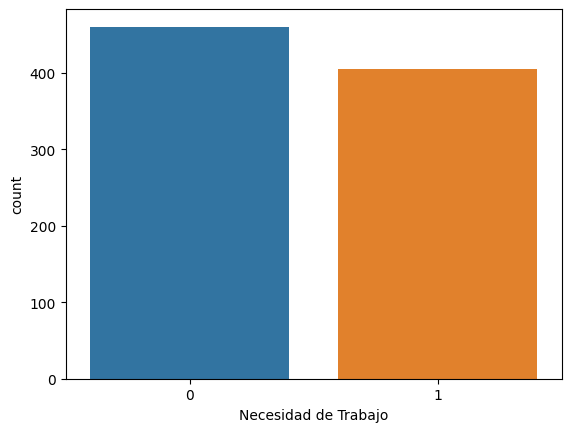

In [ ]:
sns.countplot(data = df, x = 'Necesidad de Trabajo')
#0 (No necesita trabajo)
#1 (Necesita trabajo)

<Axes: xlabel='Necesidad de Trabajo', ylabel='Edad'>

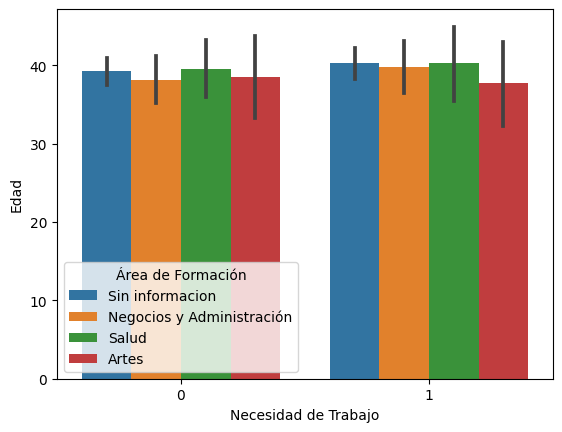

In [ ]:
sns.barplot(x = 'Necesidad de Trabajo', y= 'Edad', data = df, hue =  'Área de Formación')

<Axes: xlabel='Necesidad de Trabajo', ylabel='Edad'>

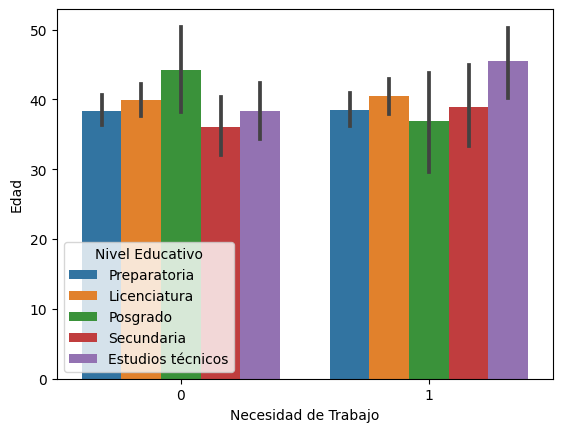

In [ ]:
sns.barplot(x = 'Necesidad de Trabajo', y = 'Edad', data = df, hue =  'Nivel Educativo')

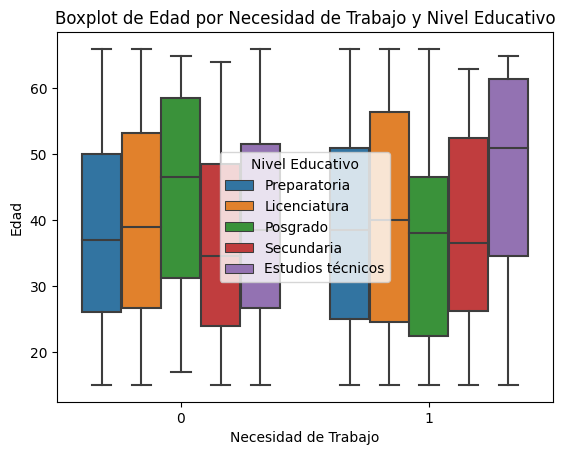

In [ ]:
# Gráfico de bigotes (boxplot)
sns.boxplot(x='Necesidad de Trabajo', y='Edad', data=df, hue='Nivel Educativo')

# Añadir etiquetas y título
plt.xlabel('Necesidad de Trabajo')
plt.ylabel('Edad')
plt.title('Boxplot de Edad por Necesidad de Trabajo y Nivel Educativo')

# Mostrar el gráfico
plt.show()

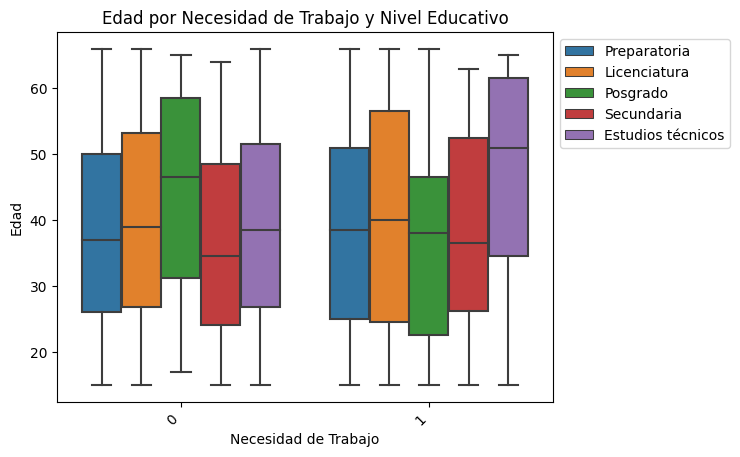

In [ ]:
# Gráfico de bigotes (boxplot)
ax = sns.boxplot(x='Necesidad de Trabajo', y='Edad', data=df, hue='Nivel Educativo')

# Ajustar la posición de las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Puedes ajustar el ángulo y la alineación según tus preferencias

# Mover la leyenda fuera del gráfico
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Añadir etiquetas y título
plt.xlabel('Necesidad de Trabajo')
plt.ylabel('Edad')
plt.title('Edad por Necesidad de Trabajo y Nivel Educativo')

# Mostrar el gráfico
plt.show()

In [ ]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(df['BloodPressure'])
plt.title('Diagrama de caja')
plt.show()

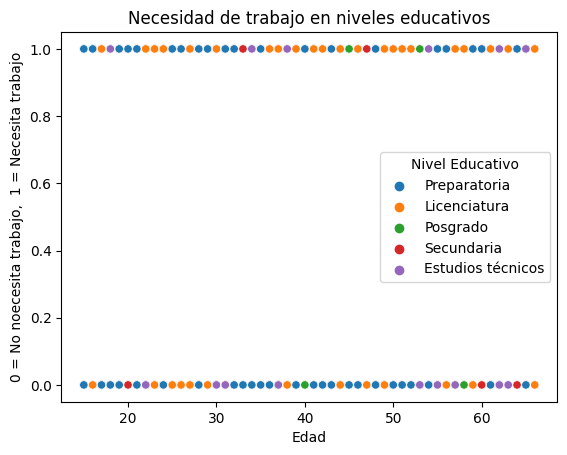

In [ ]:
# Creaamos un gráfico de dispersión entre total_bill y tip
sns.scatterplot(x='Edad', y='Necesidad de Trabajo', data=df, hue = 'Nivel Educativo')

# Agregar título y etiquetas de ejes
plt.title('Necesidad de trabajo en niveles educativos')
plt.xlabel('Edad')
plt.ylabel('0 = No noecesita trabajo,  1 = Necesita trabajo')

# Mostrar el gráfico
plt.show()


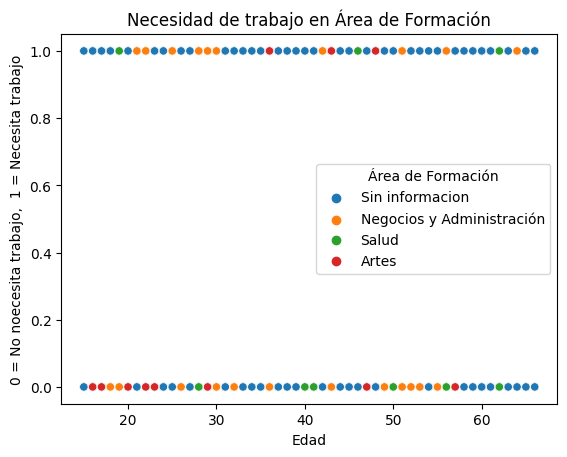

In [ ]:

sns.scatterplot(x='Edad', y='Necesidad de Trabajo', data=df, hue = 'Área de Formación')


plt.title('Necesidad de trabajo en Área de Formación')
plt.xlabel('Edad')
plt.ylabel('0 = No noecesita trabajo,  1 = Necesita trabajo')

# Mostrar el gráfico
plt.show()


-- Analisis varios gráficos

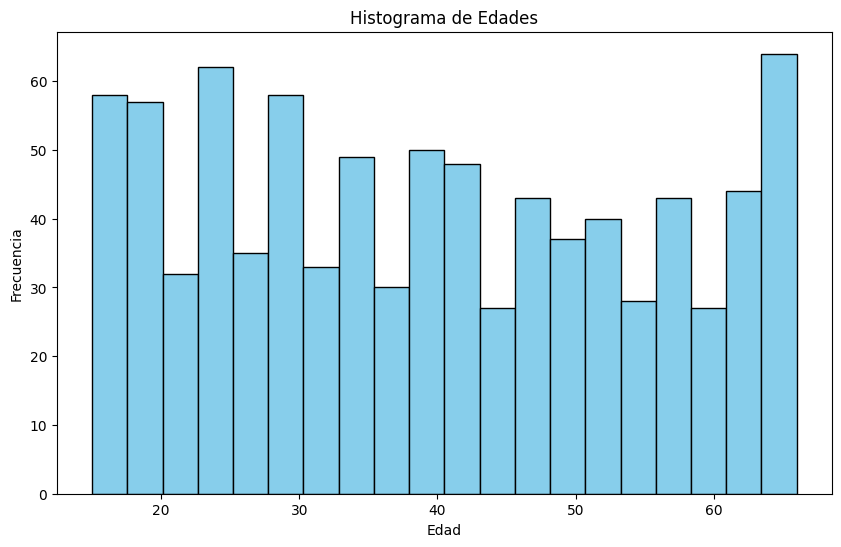

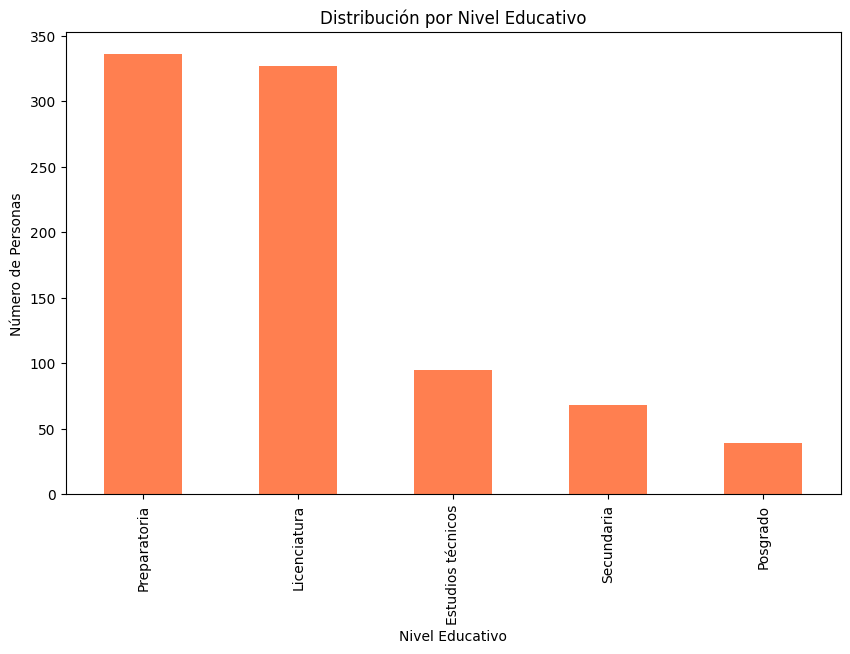

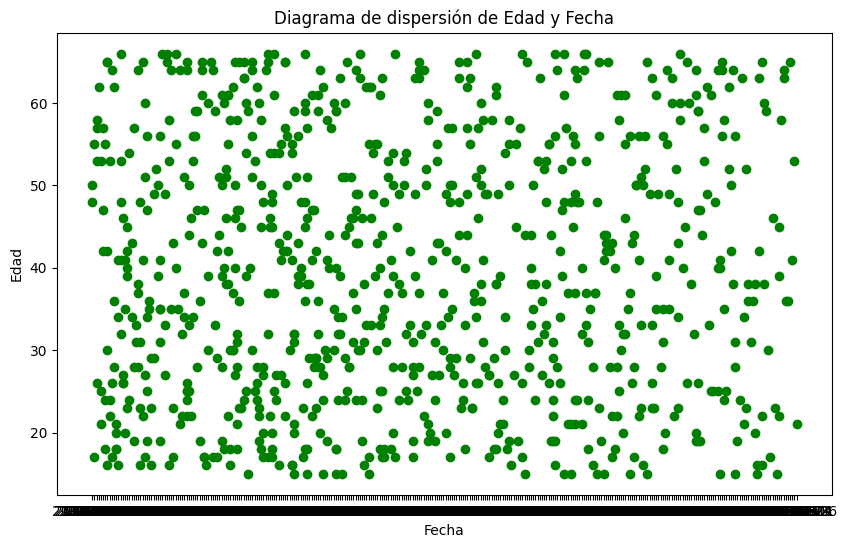

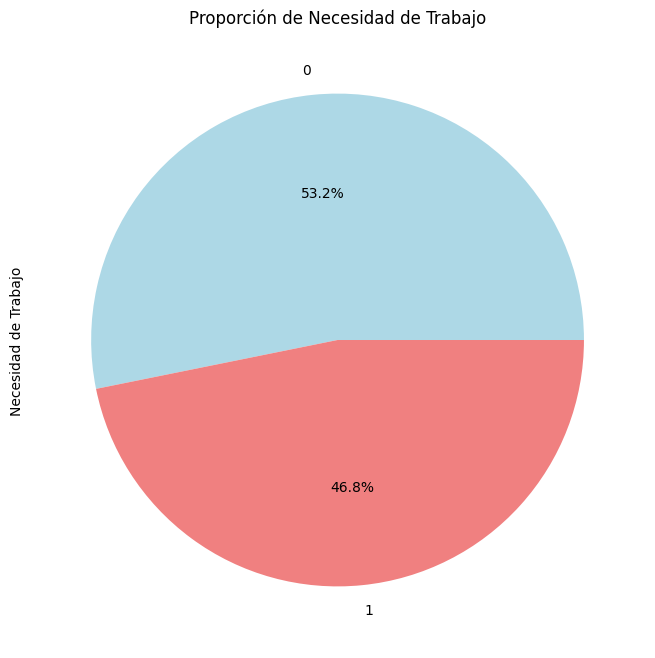

In [ ]:
# Histograma de Edades
plt.figure(figsize=(10, 6))
plt.hist(df['Edad'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de Barras para Nivel Educativo
plt.figure(figsize=(10, 6))
df['Nivel Educativo'].value_counts().plot(kind='bar', color='coral')
plt.title('Distribución por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Número de Personas')
plt.show()

# Diagrama de dispersión para Edad y Fecha
plt.figure(figsize=(10, 6))
plt.scatter(df['Fecha'], df['Edad'], color='green')
plt.title('Diagrama de dispersión de Edad y Fecha')
plt.xlabel('Fecha')
plt.ylabel('Edad')
plt.show()

# Gráfico de Pastel para Necesidad de Trabajo
plt.figure(figsize=(8, 8))
df['Necesidad de Trabajo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proporción de Necesidad de Trabajo')
plt.show()

## Variables independientes:
- Nivel educativo


In [ ]:

sns.countplot(data = df, x = 'Nivel Educativo')

- Area de formación

In [ ]:

sns.countplot(data = df, x = 'Área de Formación')

- Observando la relación entre variables:

In [ ]:


sns.heatmap(df.select_dtypes(include='number').corr(),
            cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
plt.show()

##Observamos que solo tenemos dos variables numericas que interponen la relación entre variables, podemos utilizar un analisis OneHotEncoder o variables dummies para visualizar mejor.

# One

In [ ]:
df

,Edad,Nivel Educativo,Necesidad de Trabajo,Área de Formación,Fecha
0,48,Preparatoria,0,Sin informacion,2018-04-15
1,17,Preparatoria,0,Negocios y Administración,2018-11-22
2,26,Licenciatura,0,Sin informacion,2018-06-29
3,62,Licenciatura,0,Sin informacion,2018-12-19
4,25,Posgrado,0,Salud,2018-09-24
...,...,...,...,...,...
860,28,Preparatoria,0,Salud,2018-02-21
861,28,Preparatoria,0,Salud,2018-03-03
862,16,Licenciatura,0,Artes,2018-11-01
863,61,Licenciatura,1,Sin informacion,2018-08-30


In [ ]:
df['Nivel Educativo'].value_counts()

Preparatoria         336
Licenciatura         327
Estudios técnicos     95
Secundaria            68
Posgrado              39
Name: Nivel Educativo, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Crea una instancia del objeto OneHotEncoder con el parámetro sparse=False
encoder = OneHotEncoder(sparse=False)

# Utiliza el método fit_transform para ajustar el codificador a la columna 'Nivel Educativo' del DataFrame df y transformarla
# El resultado, y_encoded, contendrá la representación one-hot de la columna 'Nivel Educativo'
Niveleducativo_encoded = encoder.fit_transform(df[['Nivel Educativo']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
Niveleducativo_encoded

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# Se asume que "encoder" es un objeto previamente creado que tiene un atributo "categories_".
# Este atributo contiene las categorías utilizadas para codificar la variable "Nivel Educativo".
categorias = encoder.categories_[0]

# Se crea un DataFrame llamado "Niveleducativo_encoded_df" que contiene las codificaciones de "Nivel Educativo".
# Las columnas del DataFrame se etiquetan con las categorías obtenidas del encoder.
Niveleducativo_encoded_df = pd.DataFrame(Niveleducativo_encoded, columns=categorias)

# Se elimina la columna original "Nivel Educativo" del DataFrame original "df".
df = df.drop(['Nivel Educativo'], axis=1)

# Se concatena el DataFrame original "df" con el nuevo DataFrame codificado "Niveleducativo_encoded_df".
# Ahora, el DataFrame "df" incluye las codificaciones de "Nivel Educativo" en lugar de la columna original.
df = pd.concat([df, Niveleducativo_encoded_df], axis=1)

# Se imprime el encabezado del DataFrame resultante para verificar los cambios.
print(df.head())


   Edad  Necesidad de Trabajo          Área de Formación       Fecha  \
0    48                     0            Sin informacion  2018-04-15   
1    17                     0  Negocios y Administración  2018-11-22   
2    26                     0            Sin informacion  2018-06-29   
3    62                     0            Sin informacion  2018-12-19   
4    25                     0                      Salud  2018-09-24   

   Estudios técnicos  Licenciatura  Posgrado  Preparatoria  Secundaria  
0                0.0           0.0       0.0           1.0         0.0  
1                0.0           0.0       0.0           1.0         0.0  
2                0.0           1.0       0.0           0.0         0.0  
3                0.0           1.0       0.0           0.0         0.0  
4                0.0           0.0       1.0           0.0         0.0  


In [ ]:
df

,Edad,Necesidad de Trabajo,Área de Formación,Fecha,Estudios técnicos,Licenciatura,Posgrado,Preparatoria,Secundaria
0,48,0,Sin informacion,2018-04-15,0.0,0.0,0.0,1.0,0.0
1,17,0,Negocios y Administración,2018-11-22,0.0,0.0,0.0,1.0,0.0
2,26,0,Sin informacion,2018-06-29,0.0,1.0,0.0,0.0,0.0
3,62,0,Sin informacion,2018-12-19,0.0,1.0,0.0,0.0,0.0
4,25,0,Salud,2018-09-24,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
860,28,0,Salud,2018-02-21,0.0,0.0,0.0,1.0,0.0
861,28,0,Salud,2018-03-03,0.0,0.0,0.0,1.0,0.0
862,16,0,Artes,2018-11-01,0.0,1.0,0.0,0.0,0.0
863,61,1,Sin informacion,2018-08-30,0.0,1.0,0.0,0.0,0.0


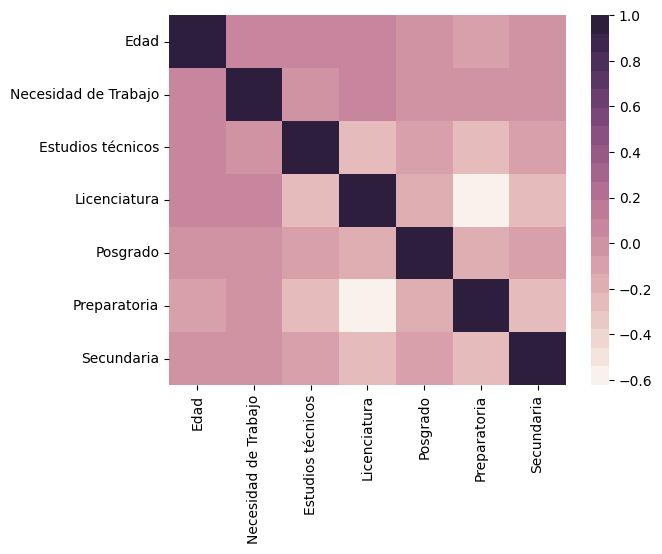

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(),
            cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
plt.show()

### podemos observar que a mayor edad, mayor es la necesidad de trabajo.

# Modelo Sin Área de Formación

In [ ]:
df.columns

Index(['Edad', 'Necesidad de Trabajo', 'Área de Formación', 'Fecha',
       'Estudios técnicos', 'Licenciatura', 'Posgrado', 'Preparatoria',
       'Secundaria'],
      dtype='object')

In [ ]:
X = df[['Edad',
       'Estudios técnicos', 'Licenciatura', 'Posgrado', 'Preparatoria',
       'Secundaria']]

y = df[['Necesidad de Trabajo']]

In [ ]:
# Importar la función 'train_test_split' desde la biblioteca scikit-learn (sklearn)
from sklearn.model_selection import train_test_split

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [ ]:
model = keras.Sequential([
    layers.Dense(6, activation='relu', input_shape=(6,)),  # Primera capa oculta con 5 nodos  # Ajusta input_shape a 22
    layers.Dense(10, activation='relu'),  # Segunda capa oculta con 10 nodos
    layers.Dense(1, activation='sigmoid')  # Capa de salida con 1 nodo
])

In [ ]:
# Compilar el modelo con los siguientes parámetros:
# - 'optimizer' se establece en 'adam', que es un algoritmo de optimización comúnmente utilizado.
# - 'loss' se establece en 'binary_crossentropy', que es una función de pérdida para problemas de clasificación binaria.
# - 'metrics' se establece en una lista que contiene 'accuracy', que se utilizará para calcular y mostrar la precisión del modelo.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
X.dtypes

Edad                   int64
Estudios técnicos    float64
Licenciatura         float64
Posgrado             float64
Preparatoria         float64
Secundaria           float64
dtype: object

In [ ]:
y.dtypes

Necesidad de Trabajo    int64
dtype: object

In [ ]:
# Entrenar el modelo utilizando los datos de entrenamiento 'X_train' y las etiquetas 'y_train' durante 1000 épocas.
historial = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
19/19 [==============================] - 1s 2ms/step - loss: 7.0896 - accuracy: 0.5488
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 4.5238 - accuracy: 0.5488
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 2.1005 - accuracy: 0.5488
Epoch 4/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.7761 - accuracy: 0.4975
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.5058
Epoch 6/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.5140
Epoch 7/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.4959
Epoch 8/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5008
Epoch 9/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.4810
Epoch 10/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.4975

In [ ]:
# Evaluar el modelo utilizando los datos de prueba 'X_test' y las etiquetas de prueba 'y_test'.
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimir la pérdida obtenida durante la evaluación.
print(f'Pérdida: {loss}')

# Imprimir la precisión obtenida durante la evaluación.
print(f'Precisión: {accuracy}')


9/9 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5038
Pérdida: 0.6924368143081665
Precisión: 0.5038461685180664


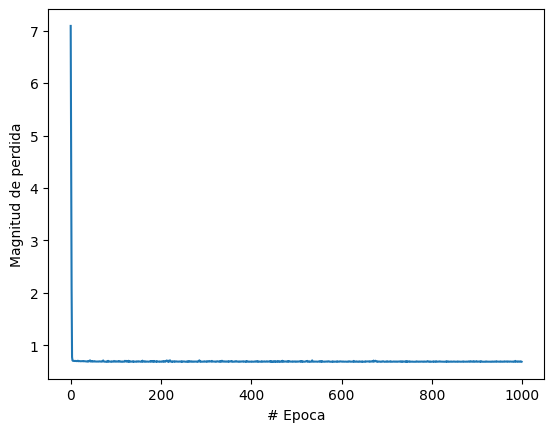

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])
#Graficamos los errores a parit de las epocas

# Modelo con Área de Formación

In [ ]:
# Crea una instancia del objeto OneHotEncoder con el parámetro sparse=False
encoder = OneHotEncoder(sparse=False)

# Utiliza el método fit_transform para ajustar el codificador a la columna 'Área de Formación' del DataFrame df y transformarla
# El resultado, y_encoded, contendrá la representación one-hot de la columna 'Área de Formación'
AreadeFormacion_encoded = encoder.fit_transform(df[['Área de Formación']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
AreadeFormacion_encoded

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [ ]:
# Se asume que "encoder" es un objeto previamente creado que tiene un atributo "categories_".
# Este atributo contiene las categorías utilizadas para codificar la variable "Nivel Educativo".
categorias = encoder.categories_[0]

# Se crea un DataFrame llamado "Niveleducativo_encoded_df" que contiene las codificaciones de "Nivel Educativo".
# Las columnas del DataFrame se etiquetan con las categorías obtenidas del encoder.
AreadeFormacion_encoded_df = pd.DataFrame(AreadeFormacion_encoded, columns=categorias)

# Se elimina la columna original "Nivel Educativo" del DataFrame original "df".
df = df.drop(['Área de Formación'], axis=1)

# Se concatena el DataFrame original "df" con el nuevo DataFrame codificado "Niveleducativo_encoded_df".
# Ahora, el DataFrame "df" incluye las codificaciones de "Nivel Educativo" en lugar de la columna original.
df = pd.concat([df, AreadeFormacion_encoded_df], axis=1)

# Se imprime el encabezado del DataFrame resultante para verificar los cambios.
print(df.head())

   Edad  Necesidad de Trabajo       Fecha  Estudios técnicos  Licenciatura  \
0    48                     0  2018-04-15                0.0           0.0   
1    17                     0  2018-11-22                0.0           0.0   
2    26                     0  2018-06-29                0.0           1.0   
3    62                     0  2018-12-19                0.0           1.0   
4    25                     0  2018-09-24                0.0           0.0   

   Posgrado  Preparatoria  Secundaria  Artes  Negocios y Administración  \
0       0.0           1.0         0.0    0.0                        0.0   
1       0.0           1.0         0.0    0.0                        1.0   
2       0.0           0.0         0.0    0.0                        0.0   
3       0.0           0.0         0.0    0.0                        0.0   
4       1.0           0.0         0.0    0.0                        0.0   

   Salud  Sin informacion  
0    0.0              1.0  
1    0.0              0.

In [ ]:
df

,Edad,Necesidad de Trabajo,Fecha,Estudios técnicos,Licenciatura,Posgrado,Preparatoria,Secundaria,Artes,Negocios y Administración,Salud,Sin informacion
0,48,0,2018-04-15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,17,0,2018-11-22,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26,0,2018-06-29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,62,0,2018-12-19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25,0,2018-09-24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
860,28,0,2018-02-21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
861,28,0,2018-03-03,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
862,16,0,2018-11-01,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
863,61,1,2018-08-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.dtypes

Edad                           int64
Necesidad de Trabajo           int64
Fecha                         object
Estudios técnicos            float64
Licenciatura                 float64
Posgrado                     float64
Preparatoria                 float64
Secundaria                   float64
Artes                        float64
Negocios y Administración    float64
Salud                        float64
Sin informacion              float64
dtype: object

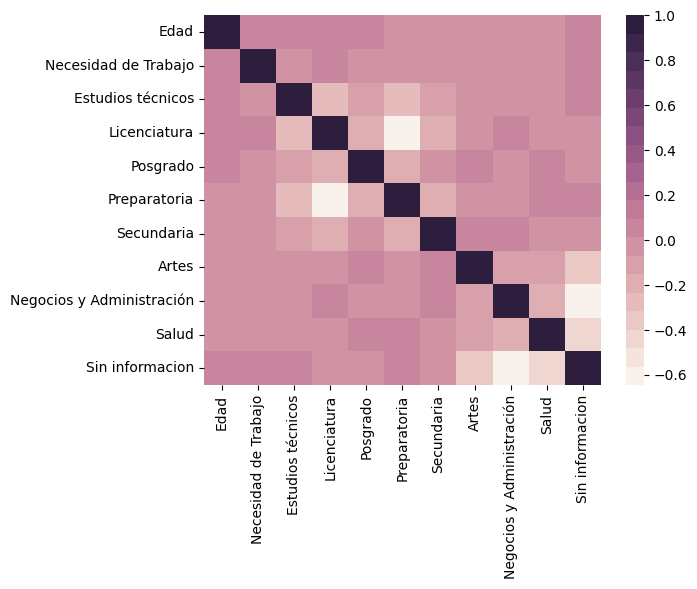

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(),
            cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
plt.show()

In [ ]:
df.columns

Index(['Edad', 'Necesidad de Trabajo', 'Fecha', 'Estudios técnicos',
       'Licenciatura', 'Posgrado', 'Preparatoria', 'Secundaria', 'Artes',
       'Negocios y Administración', 'Salud', 'Sin informacion'],
      dtype='object')

In [ ]:
X = df[['Edad','Estudios técnicos',
       'Licenciatura', 'Posgrado', 'Preparatoria', 'Secundaria', 'Artes',
       'Negocios y Administración', 'Salud', 'Sin informacion']]

y = df[['Necesidad de Trabajo']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),  # Ajusta el número de nodos y considera una arquitectura más profunda
    layers.Dense(32, activation='relu'),  # Reducir nodos para la segunda capa
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compilar el modelo con los siguientes parámetros:
# - 'optimizer' se establece en 'adam', que es un algoritmo de optimización comúnmente utilizado.
# - 'loss' se establece en 'binary_crossentropy', que es una función de pérdida para problemas de clasificación binaria.
# - 'metrics' se establece en una lista que contiene 'accuracy', que se utilizará para calcular y mostrar la precisión del modelo.
#model.compile(optimizer='adam',
              #loss='binary_crossentropy',
              #metrics=['accuracy'])

from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Entrenar el modelo utilizando los datos de entrenamiento 'X_train' y las etiquetas 'y_train' durante 1000 épocas.
historial_2 = model.fit(X_train, y_train, epochs=3000)


Se han truncado las últimas 5000 líneas del flujo de salida.
19/19 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5388
Epoch 502/3000
19/19 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5587
Epoch 503/3000
19/19 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5405
Epoch 504/3000
19/19 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5471
Epoch 505/3000
19/19 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5570
Epoch 506/3000
19/19 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5438
Epoch 507/3000
19/19 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5653
Epoch 508/3000
19/19 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5719
Epoch 509/3000
19/19 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5537
Epoch 510/3000
19/19 [==============

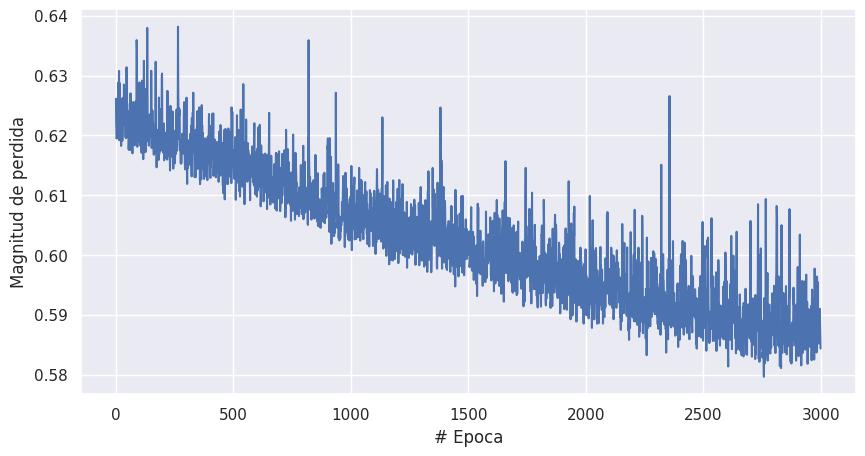

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial_2.history["loss"])
#Graficamos los errores a parit de las epocas

##### Cambiamos el tipo de otmizador y los nodos, obtuvimos una presicion de  65% esto es poco, pero hay que tener en cuenta que tenemos pocos datos y pocas variables que interactuen de una manera fuerte con la variable a predecir.

# Codificando la fecha para agregarla al modelo y intentado mejorar el modelo.

In [ ]:
df

,Edad,Necesidad de Trabajo,Estudios técnicos,Licenciatura,Posgrado,Preparatoria,Secundaria,Artes,Negocios y Administración,Salud,Sin informacion,Mes,DiaSemana
0,48,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4,6
1,17,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11,3
2,26,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,4
3,62,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,2
4,25,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,28,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,2
861,28,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3,5
862,16,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11,3
863,61,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8,3


In [ ]:
# Asegúrate de convertir la columna de fecha a tipo datetime si aún no lo está
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer características de la fecha
df['Mes'] = df['Fecha'].dt.month
df['DiaSemana'] = df['Fecha'].dt.dayofweek  # Lunes es 0, Domingo es 6

# consideramos otras características como el día del mes, el día del año, etc.

# Eliminar la columna original de fecha si no la necesitas para el modelo
df = df.drop('Fecha', axis=1)

In [ ]:
df

,Edad,Necesidad de Trabajo,Estudios técnicos,Licenciatura,Posgrado,Preparatoria,Secundaria,Artes,Negocios y Administración,Salud,Sin informacion,Mes,DiaSemana
0,48,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4,6
1,17,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11,3
2,26,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,4
3,62,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,2
4,25,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,28,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,2
861,28,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3,5
862,16,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11,3
863,61,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8,3


In [ ]:
df.columns

Index(['Edad', 'Necesidad de Trabajo', 'Estudios técnicos', 'Licenciatura',
       'Posgrado', 'Preparatoria', 'Secundaria', 'Artes',
       'Negocios y Administración', 'Salud', 'Sin informacion', 'Mes',
       'DiaSemana'],
      dtype='object')

In [ ]:
X = df[['Edad','Estudios técnicos', 'Licenciatura',
       'Posgrado', 'Preparatoria', 'Secundaria', 'Artes',
       'Negocios y Administración', 'Salud', 'Sin informacion', 'Mes',
       'DiaSemana']]

y = df[['Necesidad de Trabajo']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [ ]:

# Supongamos que ahora tienes 12 características después de agregar las columnas de mes y día de la semana
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(12,)),  # Ajusta el número de nodos y considera una arquitectura más profunda
    layers.Dropout(0.5),  # Agrega dropout para regularización
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # Agregar otro dropout
    layers.Dense(1, activation='sigmoid')
])


In [ ]:

from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
historial_3 = model.fit(X_train, y_train, epochs=3000)

Se han truncado las últimas 5000 líneas del flujo de salida.
19/19 [==============================] - 0s 5ms/step - loss: 0.6179 - accuracy: 0.6248
Epoch 502/3000
19/19 [==============================] - 0s 4ms/step - loss: 0.6301 - accuracy: 0.5636
Epoch 503/3000
19/19 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.5934
Epoch 504/3000
19/19 [==============================] - 0s 4ms/step - loss: 0.6216 - accuracy: 0.6182
Epoch 505/3000
19/19 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.6165
Epoch 506/3000
19/19 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.6182
Epoch 507/3000
19/19 [==============================] - 0s 3ms/step - loss: 0.6283 - accuracy: 0.6017
Epoch 508/3000
19/19 [==============================] - 0s 4ms/step - loss: 0.6256 - accuracy: 0.6050
Epoch 509/3000
19/19 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.5950
Epoch 510/3000
19/19 [==============

In [ ]:

loss, accuracy = model.evaluate(X_train, y_train)

print(f'Pérdida: {loss}')

print(f'Precisión: {accuracy}')

19/19 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7851
Pérdida: 0.4560759663581848
Precisión: 0.7851239442825317


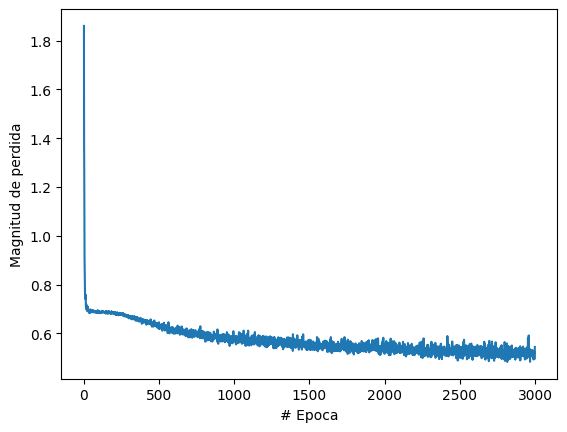

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial_3.history["loss"])
#Graficamos los errores a parit de las epocas

# Modelo siguiente:

https://colab.research.google.com/drive/1TiDo0piDYHFpT8nBeiGDcw0mcH6m_H69?usp=sharing